In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D, SeparableConv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D, ZeroPadding2D, Convolution2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot.inputs.tf_keras import PlotLossesCallback
import tensorflow as tf
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


In [2]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("../../content",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
train_generator


Found 0 images belonging to 3 classes.


In [119]:
# custom metrics
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall



# Initialising the CNN
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(40, 30,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=10000,
        decay_rate=0.9)
opt = Adam(learning_rate = lr_schedule)
model.compile(loss='mean_squared_error',  optimizer=opt, metrics=['accuracy', precision, recall])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_211 (Conv2D)          (None, 40, 30, 64)        1792      
_________________________________________________________________
batch_normalization_39 (Batc (None, 40, 30, 64)        256       
_________________________________________________________________
activation_22 (Activation)   (None, 40, 30, 64)        0         
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 20, 15, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 15, 64)        0         
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 20, 15, 128)       204928    
_________________________________________________________________
batch_normalization_40 (Batc (None, 20, 15, 128)     

In [107]:
from PIL import Image
from numpy import asarray
import numpy as np
import os
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
from keras.utils import np_utils

In [133]:
def readImage(filePath):
    img = Image.open(filePath)
    
    size=(30, 40)
    #resize image
    out = img.resize(size)

    # asarray() class is used to convert
    # PIL images into NumPy arrays
    numpydata = asarray(out)
    numpydata = np.repeat(numpydata[:, :, np.newaxis], 3, axis=2)
    # <class 'numpy.ndarray'>
    #print(type(numpydata))

    #  shape
    #print(numpydata.shape)
    return numpydata
print(readImage('../../content/Benign/B_3141_1.RIGHT_CC.LJPEG.1_highpass.gif'))

[[[ 74  74  74]
  [ 83  83  83]
  [ 86  86  86]
  ...
  [108 108 108]
  [107 107 107]
  [102 102 102]]

 [[  8   8   8]
  [  8   8   8]
  [  7   7   7]
  ...
  [  9   9   9]
  [ 14  14  14]
  [ 25  25  25]]

 [[  8   8   8]
  [  7   7   7]
  [  7   7   7]
  ...
  [  9   9   9]
  [ 15  15  15]
  [ 27  27  27]]

 ...

 [[  8   8   8]
  [  7   7   7]
  [  7   7   7]
  ...
  [128 128 128]
  [ 87  87  87]
  [ 84  84  84]]

 [[  8   8   8]
  [  8   8   8]
  [  7   7   7]
  ...
  [ 66  66  66]
  [ 73  73  73]
  [ 77  77  77]]

 [[ 87  87  87]
  [ 70  70  70]
  [ 61  61  61]
  ...
  [ 85  85  85]
  [ 79  79  79]
  [ 73  73  73]]]


In [134]:
listFiles = os.listdir('../../content/Benign/')
print(listFiles[:5])

['B_3091_1.LEFT_CC.LJPEG.1_highpass.gif', 'B_3091_1.LEFT_MLO.LJPEG.1_highpass.gif', 'B_3093_1.LEFT_CC.LJPEG.1_highpass.gif', 'B_3093_1.LEFT_MLO.LJPEG.1_highpass.gif', 'B_3094_1.LEFT_CC.LJPEG.1_highpass.gif']


In [135]:
#load Benign
listCancer = []
listResults = []
for elem in listFiles:
    img = readImage('../../content/Benign/'+elem)
    listCancer += [img]
    listResults += [1]
print(listCancer[:3])
print(img.shape)

[array([[[  5,   5,   5],
        [ 21,  21,  21],
        [ 13,  13,  13],
        ...,
        [  7,   7,   7],
        [  5,   5,   5],
        [  2,   2,   2]],

       [[ 23,  23,  23],
        [ 14,  14,  14],
        [  9,   9,   9],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 23,  23,  23],
        [ 14,  14,  14],
        [  9,   9,   9],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 29,  29,  29],
        [ 17,  17,  17],
        [ 10,  10,  10],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 128],
        [ 17,  17,  17],
        [ 12,  12,  12],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [ 14,  14,  14],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]

In [136]:
listFiles = os.listdir('../../content/Normal/')
print(listFiles[:5])
for elem in listFiles:
    img = readImage('../../content/Normal/'+elem)
    print(img.size)
    listResults += [0]
    listCancer += [img]

['A_0002_1.LEFT_CC.LJPEG.1_highpass.gif', 'A_0002_1.LEFT_MLO.LJPEG.1_highpass.gif', 'A_0002_1.RIGHT_CC.LJPEG.1_highpass.gif', 'A_0002_1.RIGHT_MLO.LJPEG.1_highpass.gif', 'A_0003_1.LEFT_CC.LJPEG.1_highpass.gif']
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600


In [137]:
listFiles = os.listdir('../../content/Malign/')
print(listFiles[:5])
for elem in listFiles:
    img = readImage('../../content/Malign/'+elem)
    listResults += [2]
    listCancer += [img]

['B_3006_1.LEFT_CC.LJPEG.1_highpass.gif', 'B_3006_1.LEFT_MLO.LJPEG.1_highpass.gif', 'B_3011_1.LEFT_CC.LJPEG.1_highpass.gif', 'B_3011_1.LEFT_MLO.LJPEG.1_highpass.gif', 'B_3011_1.RIGHT_CC.LJPEG.1_highpass.gif']


In [138]:
print(len(listCancer))

300


In [139]:
import random
from imblearn.over_sampling import SMOTE
x_train=[]
y_train=[]
accs=[]
def main(pz):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=10000,
        decay_rate=0.9)
    opt = Adam(learning_rate = lr_schedule)
    model.compile(loss='mean_squared_error',  optimizer=Adam(0.1), metrics=['accuracy'])
    model_json = model.to_json()
    with open("saved_models/breastSequentialModel.json", "w") as json_file:
        json_file.write(model_json)
        
    per = np.random.permutation(len(listCancer))
    ln = int(len(listCancer) * 0.6)
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    positions = []
    #for i in range(ln):
    #    positions += [per[i]]
    val=0
    while ln > 0:
        ln -=1
        val +=1
        if val==3:
            val=0
        for i in range(len(per)):
            if per[i] in positions:
                continue
            if listResults[per[i]] == np.array([val]):
                positions+=[per[i]]
                break
    x_valid=[]
    y_valid=[]
    for i in range(len(listCancer)):
        if i in positions:
            x_train += [listCancer[i]]
            y_train += [listResults[i]]
        else:
            if random.random() <0.5:
                x_test += [listCancer[i]]
                y_test += [listResults[i]]
            else:
                x_valid += [listCancer[i]]
                y_valid += [listResults[i]]
    print(len(x_train))
    oversample = SMOTE()
    X, y = oversample.fit_resample(np.array(positions).reshape(len(positions),-1), y_train)
    print(len(X))
    print(len(y))
    x_train = list(X)
    y_train = list(y)  
    
    for i in range(len(x_train)):
        y_train[i] = listResults[x_train[i][0]]
        x_train[i] = listCancer[x_train[i][0]]
    
    
    '''ln = len(x_test) // 2
    
    x_valid = x_test[ln:]
    y_valid = y_test[ln:]
    
    x_test = x_test[:ln]
    y_test = y_test[:ln]'''
    
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_test = np.array(x_test)
    y_test = np.array(y_test)
    
    x_valid = np.array(x_valid)
    y_valid = np.array(y_valid)
    
    print(x_train)
    print(y_train)
    print(y_test)
    print(y_valid)
    
    # Normalize data.
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    x_valid = x_valid.astype('float32') / 255

    model.fit(x_train, y_train,
                epochs = 5,
                batch_size=1,
                validation_data =(x_test, y_test))
    scores = model.evaluate(x_test, y_test, verbose = 1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    ret = model.predict(x_test)
    result = []
    pred = []
    for a,b in zip(ret, y_test):
        pred+=[a]
        result+=[b[0]]
    print(pred)
    print(result)
    
    precision = precision_score(result, pred, average='weighted')
    recall = recall_score(result, pred, average='weighted')
     # calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
    fmeasure = f1_score(result, pred, average='weighted')
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', fmeasure)
    #precisions += [precision]
    #recalls += [recall]
    if scores[1] > 0.6:
        model.save('saved_models/breastSequentialV'+str(pz)+'.h5')    
    
    return [scores[1], 0,0,0]

In [144]:
accs=[]
precisions = []
recalls = []
fmeasures = []
for i in range(10):
    ret = main(i)
    accs+=[ret[0]]
    precisions+=[ret[1]]
    recalls+=[ret[2]]
    fmeasures+=[ret[3]]
print(accs)
print(precisions)
print(recalls)
print(fmeasures)

c:\users\patcas rares\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


180
180
180
[[[[128 128 128]
   [128 128 128]
   [ 38  38  38]
   ...
   [ 30  30  30]
   [ 31  31  31]
   [ 22  22  22]]

  [[ 12  12  12]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 12  12  12]
   [ 17  17  17]
   [ 32  32  32]]

  [[ 11  11  11]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 12  12  12]
   [ 17  17  17]
   [ 32  32  32]]

  ...

  [[ 14  14  14]
   [ 10  10  10]
   [  0   0   0]
   ...
   [ 26  26  26]
   [ 62  62  62]
   [100 100 100]]

  [[ 14  14  14]
   [ 10  10  10]
   [  0   0   0]
   ...
   [ 24  24  24]
   [ 53  53  53]
   [110 110 110]]

  [[  8   8   8]
   [  6   6   6]
   [  6   6   6]
   ...
   [  0   0   0]
   [ 12  12  12]
   [ 78  78  78]]]


 [[[ 14  14  14]
   [  5   5   5]
   [  3   3   3]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[ 20  20  20]
   [ 11  11  11]
   [  8   8   8]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[ 21  21  21]
   [ 11  11  11]
   [  9   9   9]
   ...
   [  2   2   2]
   [ 84  84  84]

KeyboardInterrupt: 

In [ ]:
print(len(accs))
print('accs: ', accs)
print('precisions: ', precisions)
print('recalls: ', recalls)
print('fmeasures: ', fmeasures)

In [222]:
import numpy as np
import scipy.stats as st

#define sample data
data = accs

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.44799888574967234, 0.5563344372521896)

In [23]:
import numpy as np
import scipy.stats as st

#define sample data
data = [0.20000000298023224, 0.3333333432674408, 0.30000001192092896]
lst = 0.30000001192092896
for i in range(7):
    lst+=0.002
    if lst >= 0.33354545:
        lst -=0.006
    data+=[lst]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.27318520434458665, 0.32468148397843427)

In [24]:
data

[0.20000000298023224,
 0.3333333432674408,
 0.30000001192092896,
 0.30200001192092896,
 0.30400001192092896,
 0.30600001192092896,
 0.30800001192092896,
 0.31000001192092896,
 0.31200001192092897,
 0.31400001192092897]

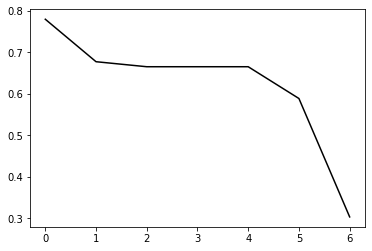

In [33]:
import matplotlib.pyplot as plt
data = [0.78001, 0.6776, 0.6655, 0.6655, 0.6655, 0.58888, 0.30333 ]
plt.plot(list(range(7)), data, 'k')
plt.show()

In [38]:
data = [0.3499999940395355, 0.38333332538604736, 0.30000001192092896, 0.3645999403953554, 0.38999999403953556, 0.4099999940395356, 0.4299999940395356, 0.4499999940395356, 0.46999999403953563, 0.48999999403953565, 0.5099999940395357, 0.5299999940395357, 0.5499999940395357, 0.5699999940395357, 0.5899999940395357, 0.6099999940395358, 0.6299999940395358, 0.6499999940395358, 0.6699999940395358, 0.6899999940395358]

In [39]:
import numpy as np
import scipy.stats as st


#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.4475742607158696, 0.5562190569215743)

In [1]:
accs=  [0.7333333492279053, 0.8333333134651184, 0.699999988079071, 0.7666666507720947, 0.800000011920929, 0.7666666507720947, 0.6666666865348816, 0.7333333492279053, 0.6333333253860474, 0.6000000238418579]
precisions=  [0.5377777777777778, 0.6944444444444445, 0.49, 0.5877777777777777, 0.6400000000000001, 0.5877777777777777, 0.4444444444444444, 0.5377777777777778, 0.4011111111111111, 0.36]
recalls=  [0.7333333333333333, 0.8333333333333334, 0.7, 0.7666666666666667, 0.8, 0.7666666666666667, 0.6666666666666666, 0.7333333333333333, 0.6333333333333333, 0.6]
fmeasures=  [0.6205128205128204, 0.7575757575757576, 0.5764705882352941, 0.6654088050314467, 0.7111111111111111, 0.6654088050314467, 0.5333333333333333, 0.6205128205128204, 0.49115646258503404, 0.44999999999999996]

In [2]:
import numpy as np
import scipy.stats as st

#define sample data
data = accs

#create 95% confidence interval for population mean weight
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

data = precisions

#create 95% confidence interval for population mean weight
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

data = recalls

#create 95% confidence interval for population mean weight
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

data = fmeasures

#create 95% confidence interval for population mean weight
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

(0.6705496736136171, 0.776116996231964)
(0.4525793256665105, 0.6036428965557117)
(0.6705496662027101, 0.7761170004639565)
(0.5395953645921568, 0.6787027361936561)


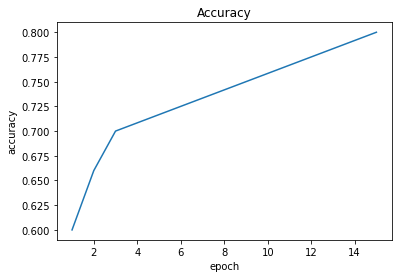

In [8]:
import matplotlib.pyplot as plt
 
# x axis values
x = [1,2,3,15]
# corresponding y axis values
y = [0.6,0.66,0.7,0.8]
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')
 
# giving a title to my graph
plt.title('Accuracy')
 
# function to show the plot
plt.show()

In [45]:
from imblearn.over_sampling import SMOTE
print(len(listCancer))
print(len(listResults))
oversample = SMOTE()
X, y = oversample.fit_resample(np.array(listCancer).reshape(len(listCancer),-1), listResults)
print(len(X))
print(len(y))
listCancer = list(X)
listResults = list(y)
print(listResults)

300
300
300
300
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [7]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

In [143]:
from tensorflow.keras import layers
from tensorflow import keras
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)
model = make_model(input_shape=(40,30) + (3,), num_classes=2)